In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [108]:
df = pd.read_csv("dataset_prepared.csv")

In [109]:
mode_order_mapping = {True: 1, False: 0}
df['explicit'] = df['explicit'].map(mode_order_mapping).astype('Int64')

In [110]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

name          object
artists       object
album_name    object
genre         object
dtype: object

In [111]:
df_train = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
df_train = df_train.drop(["key","time_signature", "mode", "explicit"], axis=1)

In [112]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_train)
type(df_train)

pandas.core.frame.DataFrame

# K-means

In [113]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [115]:

sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

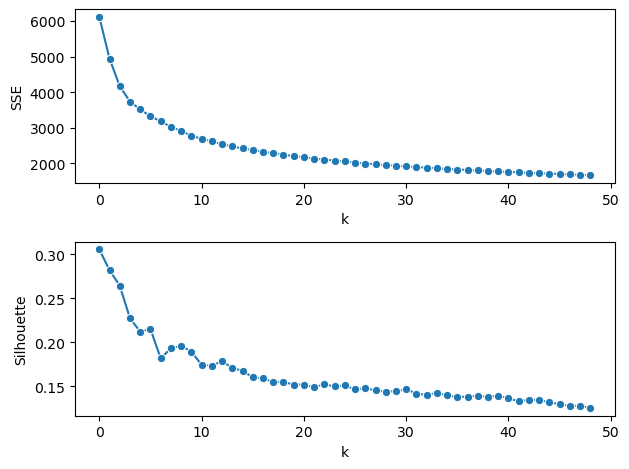

In [116]:
fig, axs = plt.subplots(2) # 1 row, 2 columns
 
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')
 
plt.tight_layout() # Adjust the padding between and around subplots
# k= 4 5 6 7

In [126]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10, max_iter=100)
kmeans.fit(df_train)

KMeans(max_iter=100, n_clusters=4, n_init=10)

#per assegnare ai 4 clusters delle lettere anzi che dei numeri
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3:"D"})

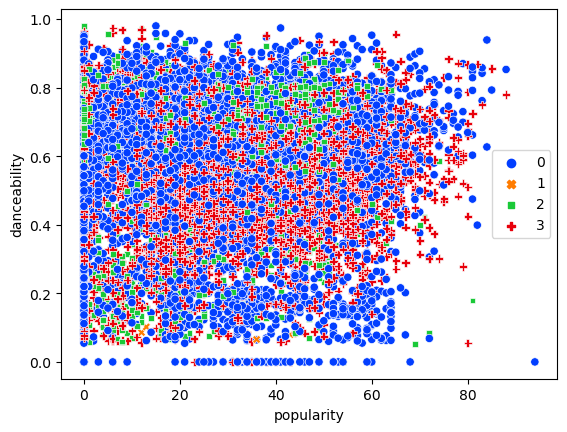

In [127]:
sns.scatterplot(data=df_train, 
                x="popularity",
                y="danceability",
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")          
plt.show()

In [130]:
kmeans.cluster_centers_
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[ 6.88713376e+11,  2.64340475e+03,  5.52356230e-01,
         6.11646230e-01, -5.57444020e+02,  8.98597522e-02,
         3.78538660e-01,  2.80894014e-01,  2.20209639e-01,
         4.72731259e-01,  2.65512812e+04],
       [ 8.70962431e+12,  1.82063158e+03,  2.40615789e-01,
         5.19323384e-01, -8.03143664e+02,  8.51722421e-02,
         3.56690125e-01,  2.94808226e-01,  2.39920211e-01,
         1.44882997e-01,  2.35178538e+04],
       [ 1.93057058e+12,  1.98563083e+03,  5.16292426e-01,
         6.64497667e-01, -5.83770233e+02,  6.81423221e-02,
         1.85015588e-01,  5.27196272e-01,  2.00840019e-01,
         3.16707895e-01,  2.71773936e+04],
       [ 1.14294197e+12,  2.64415276e+03,  5.32720959e-01,
         7.04362422e-01, -4.58439854e+02,  6.86268201e-02,
         2.45303461e-01,  2.37546777e-01,  2.13552833e-01,
         4.20460760e-01,  2.78216730e+04]])

In [132]:
df_train['kmeans_labels'] = kmeans.labels_
df_train['kmeans_labels'] = df_train['kmeans_labels'].map({0:"A", 1: "B", 2: "C",3: "D"})

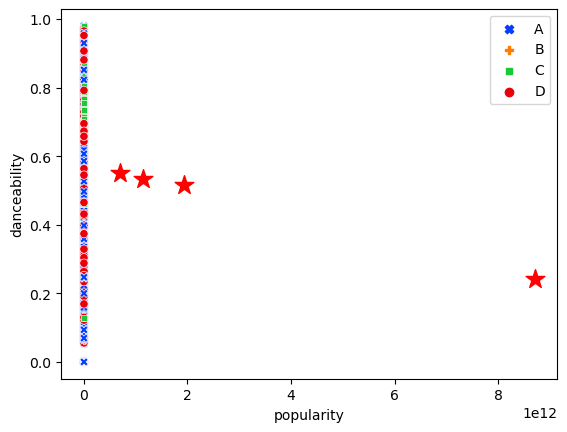

In [136]:
sns.scatterplot(data=df_train, 
                x="popularity", 
                y="danceability", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C", "D"]
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()